In [9]:
# Dependencies and setup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.special import boxcox1p
from sklearn.preprocessing import Imputer
%matplotlib inline

In [10]:
# Set maximum rows to a high number
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [11]:
# Load dataset
training_data = pd.read_csv("01-raw_data/train.csv",index_col=0)

In [12]:
training_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Investigating the dependent variable

* The price of homes in Ames, IA tends to be within $120K - 220K
* The dependent variable (listing price) is right skewed, which will need to be adjusted prior to completing the regression
* A logarithmic transformation significantly improves the normality issue

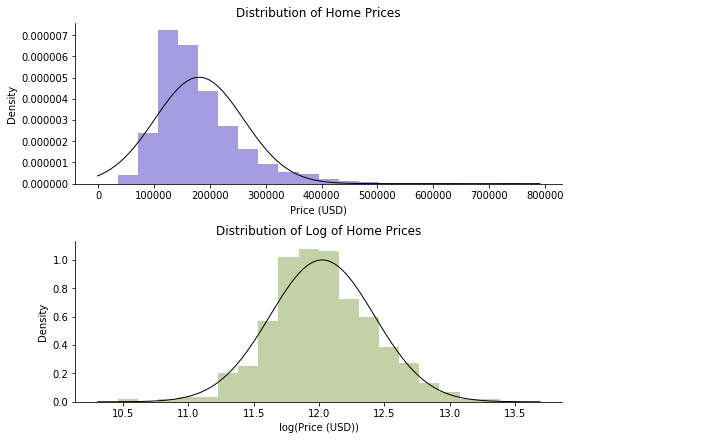

In [25]:
# Establish figure and grid to create two charts in the same image
home_prices_fig = plt.figure(constrained_layout=True,figsize=(10,6))
home_prices_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=home_prices_fig)

# Create histogram for housing price data
ax1 = home_prices_fig.add_subplot(home_prices_grid[0,:2])
ax1.set_title("Distribution of Home Prices")
mu, std = norm.fit(training_data["SalePrice"])
training_data["SalePrice"].hist(bins=20,color="slateblue",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("Price (USD)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Create histogram for log of housing price data
ax2 = home_prices_fig.add_subplot(home_prices_grid[1, :2])
ax2.set_title("Distribution of Log of Home Prices")
mu, std = norm.fit(np.log(training_data["SalePrice"]))
(np.log(training_data["SalePrice"])).hist(bins=20,color="olivedrab",density=True,alpha=0.4)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("log(Price (USD))")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

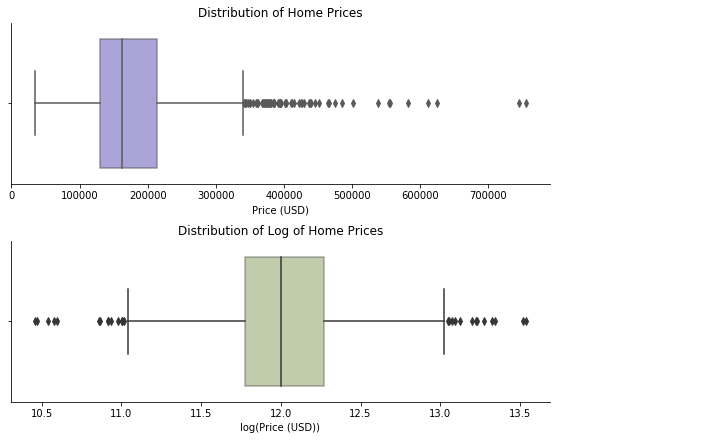

In [14]:
# Establish figure and grid to create two charts in the same image
home_prices_fig = plt.figure(constrained_layout=True,figsize=(10,6))
home_prices_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=home_prices_fig)

# Create boxplot of home price data
ax1 = home_prices_fig.add_subplot(home_prices_grid[0, :2])
ax1.set_title("Distribution of Home Prices")
sns.boxplot(training_data.SalePrice, orient="h", ax=ax1, color="slateblue", boxprops=dict(alpha=.6))
plt.xlabel("Price (USD)")
plt.grid(False)
sns.despine()

# Create boxplot of log of home price data
ax2 = home_prices_fig.add_subplot(home_prices_grid[1, :2])
ax2.set_title("Distribution of Log of Home Prices")
sns.boxplot(np.log(training_data.SalePrice), orient="h", ax=ax2, color="olivedrab", boxprops=dict(alpha=.4))
plt.xlabel("log(Price (USD))")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

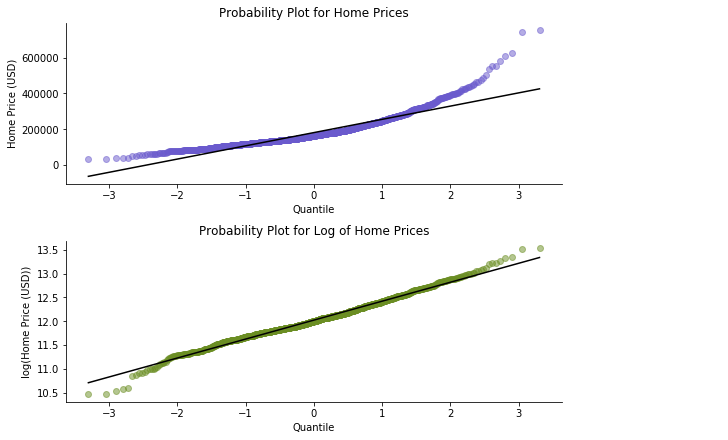

In [26]:
# Establish figure and grid to create two charts in the same image
home_prices_fig = plt.figure(constrained_layout=True,figsize=(10,6))
home_prices_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=home_prices_fig)

# Create QQ Plot of home price data
ax1 = home_prices_fig.add_subplot(home_prices_grid[0, :2])
stats.probplot(training_data["SalePrice"], plot = ax1)
# Change titles
plt.title("Probability Plot for Home Prices")
plt.xlabel("Quantile")
plt.ylabel("Home Price (USD)")
# Change line and marker colors
ax1.get_lines()[0].set_markeredgecolor('slateblue')
ax1.get_lines()[0].set_markerfacecolor('slateblue')
ax1.get_lines()[0].set_alpha(0.5)
ax1.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Create QQ Plot of log of home price data
ax2 = home_prices_fig.add_subplot(home_prices_grid[1, :2])
stats.probplot(np.log(training_data.SalePrice), plot = ax2)
# Change titles
plt.title("Probability Plot for Log of Home Prices")
plt.xlabel("Quantile")
plt.ylabel("log(Home Price (USD))")
# Change line and marker colors
ax2.get_lines()[0].set_markeredgecolor('olivedrab')
ax2.get_lines()[0].set_markerfacecolor('olivedrab')
ax2.get_lines()[0].set_alpha(0.5)
ax2.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

In [16]:
print("------------------------------------------------------------------")
print(f"Skew of the housing price data is: {round(training_data['SalePrice'].skew(),3)}")
print(f"Skew of the log of housing price data is: {round(np.log(training_data['SalePrice']).skew(),3)}")
print("------------------------------------------------------------------")
print("Logarithmic transformation significantly improves the skew issue")
print("------------------------------------------------------------------")

------------------------------------------------------------------
Skew of the housing price data is: 1.883
Skew of the log of housing price data is: 0.121
------------------------------------------------------------------
Logarithmic transformation significantly improves the skew issue
------------------------------------------------------------------


## Investigating Numeric Independent Variables

### Total Square feet
* Homes in Ames, IA tends to be between 1,000 and 2,000 square feet
* Square feet is a right skewed variable, but when logarithmically tranformed, approximates a normal distribution
* Square feet is positively correlated with housing prices

In [27]:
# Create a square feet variable
training_data["SF"] = training_data["1stFlrSF"] + training_data["2ndFlrSF"]

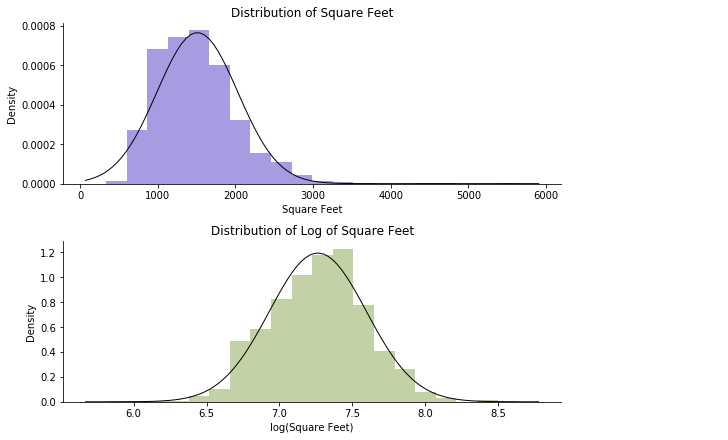

In [28]:
# Establish figure and grid to create two charts in the same image
square_feet_fig = plt.figure(constrained_layout=True,figsize=(10,6))
square_feet_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=square_feet_fig)

# Create histogram for square feet data
ax1 = square_feet_fig.add_subplot(square_feet_grid[0,:2])
ax1.set_title("Distribution of Square Feet")
mu, std = norm.fit(training_data["SF"])
training_data["SF"].hist(bins=20,color="slateblue",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("Square Feet")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Create histogram for log of square feet data
ax2 = square_feet_fig.add_subplot(square_feet_grid[1, :2])
ax2.set_title("Distribution of Log of Square Feet")
mu, std = norm.fit(np.log(training_data["SF"]))
(np.log(training_data["SF"])).hist(bins=20,color="olivedrab",density=True,alpha=0.4)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("log(Square Feet)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

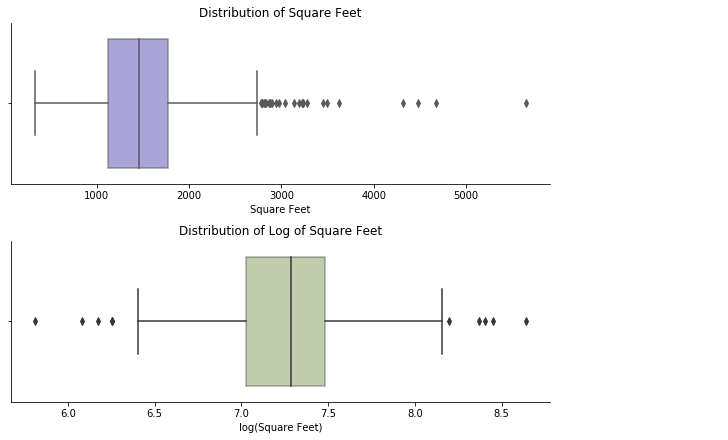

In [29]:
# Establish figure and grid to create two charts in the same image
square_feet_fig = plt.figure(constrained_layout=True,figsize=(10,6))
square_feet_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=square_feet_fig)

# Create boxplot of square feet data
ax1 = square_feet_fig.add_subplot(square_feet_grid[0, :2])
ax1.set_title("Distribution of Square Feet")
sns.boxplot(training_data.SF, orient="h", ax=ax1, color="slateblue", boxprops=dict(alpha=.6))
plt.xlabel("Square Feet")
plt.grid(False)
sns.despine()

# Create boxplot of log of square feet data
ax2 = square_feet_fig.add_subplot(square_feet_grid[1, :2])
ax2.set_title("Distribution of Log of Square Feet")
sns.boxplot(np.log(training_data.SF), orient="h", ax=ax2, color="olivedrab", boxprops=dict(alpha=.4))
plt.xlabel("log(Square Feet)")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

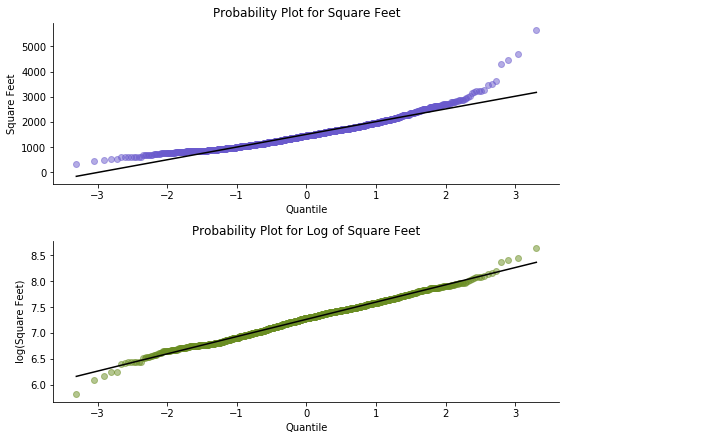

In [30]:
# Establish figure and grid to create two charts in the same image
square_feet_fig = plt.figure(constrained_layout=True,figsize=(10,6))
square_feet_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=square_feet_fig)

# Create QQ Plot of square feet data
ax1 = square_feet_fig.add_subplot(square_feet_grid[0, :2])
stats.probplot(training_data["SF"], plot = ax1)
# Change titles
plt.title("Probability Plot for Square Feet")
plt.xlabel("Quantile")
plt.ylabel("Square Feet")
# Change line and marker colors
ax1.get_lines()[0].set_markeredgecolor('slateblue')
ax1.get_lines()[0].set_markerfacecolor('slateblue')
ax1.get_lines()[0].set_alpha(0.5)
ax1.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Create QQ Plot of log of square feet data
ax2 = square_feet_fig.add_subplot(square_feet_grid[1, :2])
stats.probplot(np.log(training_data.SF), plot = ax2)
# Change titles
plt.title("Probability Plot for Log of Square Feet")
plt.xlabel("Quantile")
plt.ylabel("log(Square Feet)")
# Change line and marker colors
ax2.get_lines()[0].set_markeredgecolor('olivedrab')
ax2.get_lines()[0].set_markerfacecolor('olivedrab')
ax2.get_lines()[0].set_alpha(0.5)
ax2.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

In [31]:
print("------------------------------------------------------------------")
print(f"Skew of the square feet data is: {round(training_data['SF'].skew(),3)}")
print(f"Skew of the log of square feet data is: {round(np.log(training_data['SF']).skew(),3)}")
print("------------------------------------------------------------------")
print("Logarithmic transformation significantly improves the skew issue")
print("------------------------------------------------------------------")

------------------------------------------------------------------
Skew of the square feet data is: 1.33
Skew of the log of square feet data is: -0.035
------------------------------------------------------------------
Logarithmic transformation significantly improves the skew issue
------------------------------------------------------------------


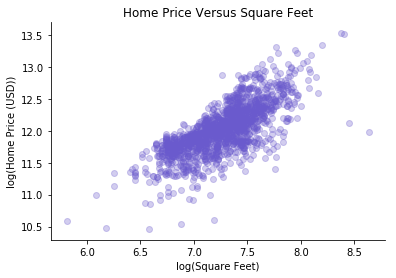

In [32]:
# Show a scatter plot comparing home price and home square feet
plt.scatter(np.log(training_data['SF']),np.log(training_data['SalePrice']),color="slateblue",alpha=0.3)
plt.title("Home Price Versus Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()

### First Floor Square feet
* First floor square feet is a right skewed variable, but when logarithmically tranformed, first floor square feet approximates a normal distribution
* First floor square feet is positively correlated with housing prices

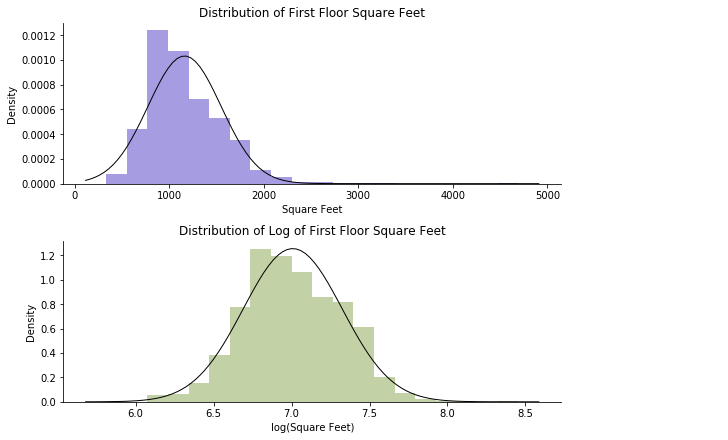

In [33]:
# Establish figure and grid to create two charts in the same image
square_feet_fig = plt.figure(constrained_layout=True,figsize=(10,6))
square_feet_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=square_feet_fig)

# Create histogram for square feet data
ax1 = square_feet_fig.add_subplot(square_feet_grid[0,:2])
ax1.set_title("Distribution of First Floor Square Feet")
mu, std = norm.fit(training_data["1stFlrSF"])
training_data["1stFlrSF"].hist(bins=20,color="slateblue",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("Square Feet")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Create histogram for log of square feet data
ax2 = square_feet_fig.add_subplot(square_feet_grid[1, :2])
ax2.set_title("Distribution of Log of First Floor Square Feet")
mu, std = norm.fit(np.log(training_data["1stFlrSF"]))
(np.log(training_data["1stFlrSF"])).hist(bins=20,color="olivedrab",density=True,alpha=0.4)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("log(Square Feet)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

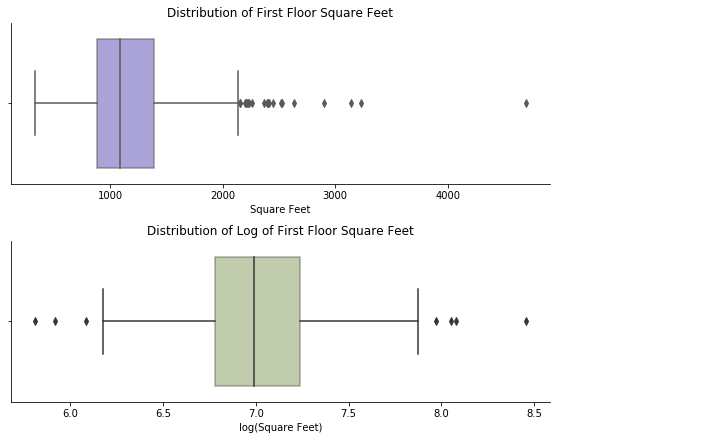

In [36]:
# Establish figure and grid to create two charts in the same image
square_feet_fig = plt.figure(constrained_layout=True,figsize=(10,6))
square_feet_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=square_feet_fig)

# Create boxplot of square feet data
ax1 = square_feet_fig.add_subplot(square_feet_grid[0, :2])
ax1.set_title("Distribution of First Floor Square Feet")
sns.boxplot(training_data["1stFlrSF"], orient="h", ax=ax1, color="slateblue", boxprops=dict(alpha=.6))
plt.xlabel("Square Feet")
plt.grid(False)
sns.despine()

# Create boxplot of log of square feet data
ax2 = square_feet_fig.add_subplot(square_feet_grid[1, :2])
ax2.set_title("Distribution of Log of First Floor Square Feet")
sns.boxplot(np.log(training_data["1stFlrSF"]), orient="h", ax=ax2, color="olivedrab", boxprops=dict(alpha=.4))
plt.xlabel("log(Square Feet)")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

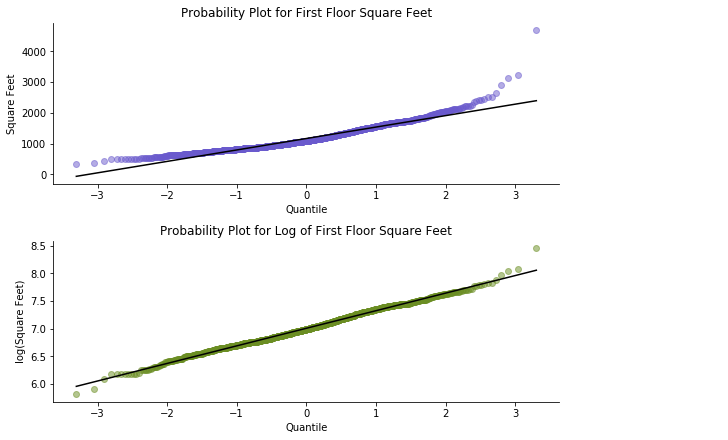

In [37]:
# Establish figure and grid to create two charts in the same image
square_feet_fig = plt.figure(constrained_layout=True,figsize=(10,6))
square_feet_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=square_feet_fig)

# Create QQ Plot of square feet data
ax1 = square_feet_fig.add_subplot(square_feet_grid[0, :2])
stats.probplot(training_data["1stFlrSF"], plot = ax1)
# Change titles
plt.title("Probability Plot for First Floor Square Feet")
plt.xlabel("Quantile")
plt.ylabel("Square Feet")
# Change line and marker colors
ax1.get_lines()[0].set_markeredgecolor('slateblue')
ax1.get_lines()[0].set_markerfacecolor('slateblue')
ax1.get_lines()[0].set_alpha(0.5)
ax1.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Create QQ Plot of log of square feet data
ax2 = square_feet_fig.add_subplot(square_feet_grid[1, :2])
stats.probplot(np.log(training_data["1stFlrSF"]), plot = ax2)
# Change titles
plt.title("Probability Plot for Log of First Floor Square Feet")
plt.xlabel("Quantile")
plt.ylabel("log(Square Feet)")
# Change line and marker colors
ax2.get_lines()[0].set_markeredgecolor('olivedrab')
ax2.get_lines()[0].set_markerfacecolor('olivedrab')
ax2.get_lines()[0].set_alpha(0.5)
ax2.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

In [38]:
print("------------------------------------------------------------------")
print(f"Skew of the first floor square feet data is: {round(training_data['1stFlrSF'].skew(),3)}")
print(f"Skew of the log of first floor square feet data is: {round(np.log(training_data['1stFlrSF']).skew(),3)}")
print("------------------------------------------------------------------")
print("Logarithmic transformation significantly improves the skew issue")
print("------------------------------------------------------------------")

------------------------------------------------------------------
Skew of the first floor square feet data is: 1.377
Skew of the log of first floor square feet data is: 0.079
------------------------------------------------------------------
Logarithmic transformation significantly improves the skew issue
------------------------------------------------------------------


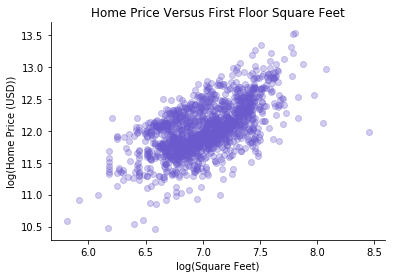

In [40]:
# Show a scatter plot comparing home price and home square feet
plt.scatter(np.log(training_data['1stFlrSF']),np.log(training_data['SalePrice']),color="slateblue",alpha=0.3)
plt.title("Home Price Versus First Floor Square Feet")
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()

### Second Floor Square feet
* First floor square feet is a right skewed variable, but when logarithmically tranformed, first floor square feet approximates a normal distribution
* First floor square feet is positively correlated with housing prices

In [43]:
# Establish an alternative dataframe for values greater than 0 (to only include two story houses)
two_story_training = training_data[training_data["2ndFlrSF"]>0]

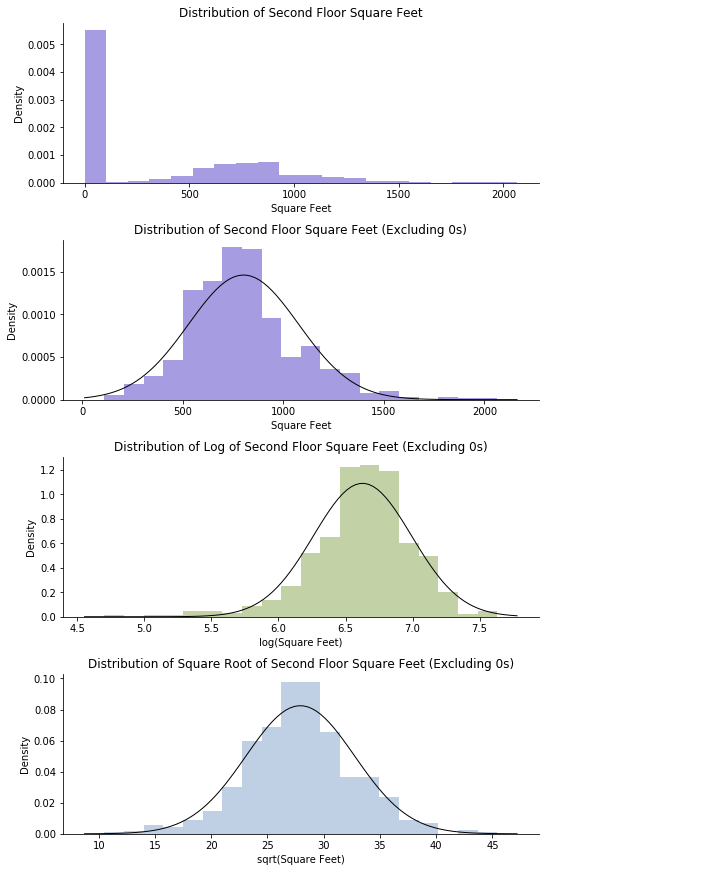

In [64]:
# Establish figure and grid to create two charts in the same image
square_feet_fig = plt.figure(constrained_layout=True,figsize=(10,12))
square_feet_grid = gridspec.GridSpec(ncols=3,nrows=4,figure=square_feet_fig)

# Create histogram for square feet data
ax1 = square_feet_fig.add_subplot(square_feet_grid[0,:2])
ax1.set_title("Distribution of Second Floor Square Feet")
training_data["2ndFlrSF"].hist(bins=20,color="slateblue",density=True,alpha=0.6)

plt.xlabel("Square Feet")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Create histogram for second floor square feet data (exclusing 0 values)
ax2 = square_feet_fig.add_subplot(square_feet_grid[1, :2])
ax2.set_title("Distribution of Second Floor Square Feet (Excluding 0s)")
mu, std = norm.fit(two_story_training["2ndFlrSF"])
two_story_training["2ndFlrSF"].hist(bins=20,color="slateblue",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("Square Feet")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Create histogram for log of second floor square feet data
ax3 = square_feet_fig.add_subplot(square_feet_grid[2, :2])
ax3.set_title("Distribution of Log of Second Floor Square Feet (Excluding 0s)")
mu, std = norm.fit(np.log(two_story_training["2ndFlrSF"]))
(np.log(two_story_training["2ndFlrSF"])).hist(bins=20,color="olivedrab",density=True,alpha=0.4)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("log(Square Feet)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Create histogram for square root of second floor square feet data
ax4 = square_feet_fig.add_subplot(square_feet_grid[3, :2])
ax4.set_title("Distribution of Square Root of Second Floor Square Feet (Excluding 0s)")
mu, std = norm.fit(np.sqrt(two_story_training["2ndFlrSF"]))
(np.sqrt(two_story_training["2ndFlrSF"])).hist(bins=20,color="lightsteelblue",density=True,alpha=0.8)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("sqrt(Square Feet)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

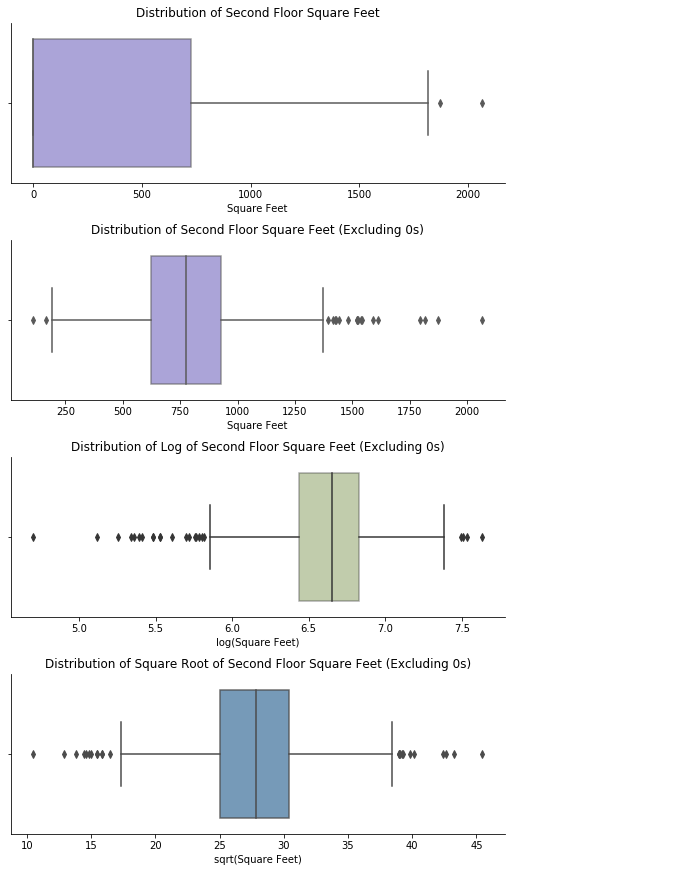

In [66]:
# Establish figure and grid to create two charts in the same image
square_feet_fig = plt.figure(constrained_layout=True,figsize=(10,12))
square_feet_grid = gridspec.GridSpec(ncols=3,nrows=4,figure=square_feet_fig)

# Create boxplot of square feet data
ax1 = square_feet_fig.add_subplot(square_feet_grid[0, :2])
ax1.set_title("Distribution of Second Floor Square Feet")
sns.boxplot(training_data["2ndFlrSF"], orient="h", ax=ax1, color="slateblue", boxprops=dict(alpha=.6))
plt.xlabel("Square Feet")
plt.grid(False)
sns.despine()

# Create boxplot of log of square feet data
ax2 = square_feet_fig.add_subplot(square_feet_grid[1, :2])
ax2.set_title("Distribution of Second Floor Square Feet (Excluding 0s)")
sns.boxplot(two_story_training["2ndFlrSF"], orient="h", ax=ax2, color="slateblue", boxprops=dict(alpha=.6))
plt.xlabel("Square Feet")
plt.grid(False)
sns.despine()

# Create boxplot of log of square feet data
ax3 = square_feet_fig.add_subplot(square_feet_grid[2, :2])
ax3.set_title("Distribution of Log of Second Floor Square Feet (Excluding 0s)")
sns.boxplot(np.log(two_story_training["2ndFlrSF"]), orient="h", ax=ax3, color="olivedrab", boxprops=dict(alpha=.4))
plt.xlabel("log(Square Feet)")
plt.grid(False)
sns.despine()

# Create boxplot of log of square feet data
ax4 = square_feet_fig.add_subplot(square_feet_grid[3, :2])
ax4.set_title("Distribution of Square Root of Second Floor Square Feet (Excluding 0s)")
sns.boxplot(np.sqrt(two_story_training["2ndFlrSF"]), orient="h", ax=ax4, color="steelblue", boxprops=dict(alpha=.8))
plt.xlabel("sqrt(Square Feet)")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

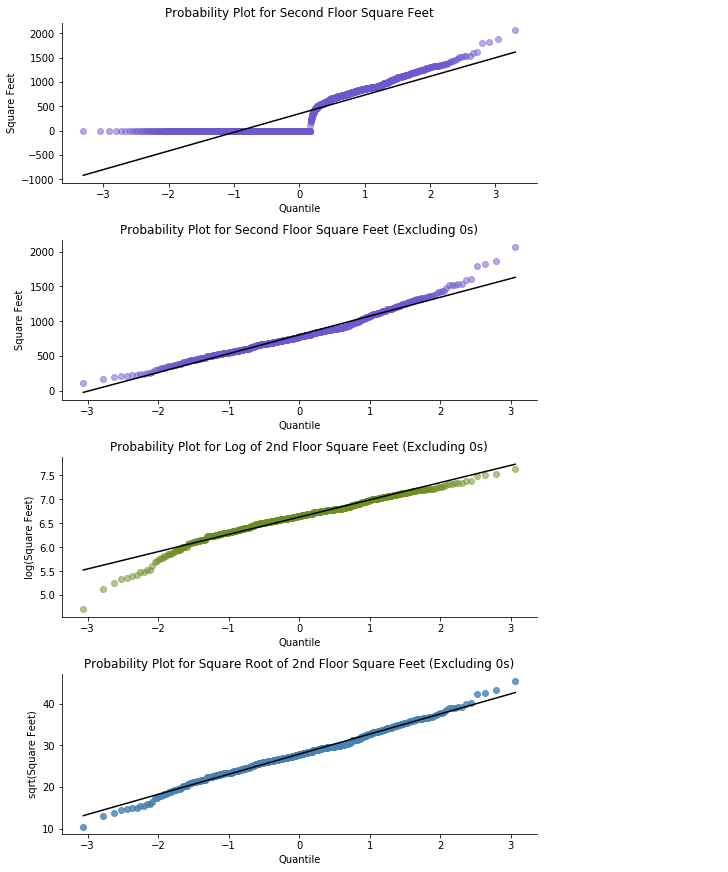

In [69]:
# Establish figure and grid to create two charts in the same image
square_feet_fig = plt.figure(constrained_layout=True,figsize=(10,12))
square_feet_grid = gridspec.GridSpec(ncols=3,nrows=4,figure=square_feet_fig)

# Create QQ Plot of square feet data
ax1 = square_feet_fig.add_subplot(square_feet_grid[0, :2])
stats.probplot(training_data["2ndFlrSF"], plot = ax1)
# Change titles
plt.title("Probability Plot for Second Floor Square Feet")
plt.xlabel("Quantile")
plt.ylabel("Square Feet")
# Change line and marker colors
ax1.get_lines()[0].set_markeredgecolor('slateblue')
ax1.get_lines()[0].set_markerfacecolor('slateblue')
ax1.get_lines()[0].set_alpha(0.5)
ax1.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Create QQ Plot of square feet data excluding 0s
ax2 = square_feet_fig.add_subplot(square_feet_grid[1, :2])
stats.probplot(two_story_training["2ndFlrSF"], plot = ax2)
# Change titles
plt.title("Probability Plot for Second Floor Square Feet (Excluding 0s)")
plt.xlabel("Quantile")
plt.ylabel("Square Feet")
# Change line and marker colors
ax2.get_lines()[0].set_markeredgecolor('slateblue')
ax2.get_lines()[0].set_markerfacecolor('slateblue')
ax2.get_lines()[0].set_alpha(0.5)
ax2.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Create QQ Plot of log of square feet data
ax3 = square_feet_fig.add_subplot(square_feet_grid[2, :2])
stats.probplot(np.log(two_story_training["2ndFlrSF"]), plot = ax3)
# Change titles
plt.title("Probability Plot for Log of 2nd Floor Square Feet (Excluding 0s)")
plt.xlabel("Quantile")
plt.ylabel("log(Square Feet)")
# Change line and marker colors
ax3.get_lines()[0].set_markeredgecolor('olivedrab')
ax3.get_lines()[0].set_markerfacecolor('olivedrab')
ax3.get_lines()[0].set_alpha(0.5)
ax3.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Create QQ Plot of square root of square feet data
ax4 = square_feet_fig.add_subplot(square_feet_grid[3, :2])
stats.probplot(np.sqrt(two_story_training["2ndFlrSF"]), plot = ax4)
# Change titles
plt.title("Probability Plot for Square Root of 2nd Floor Square Feet (Excluding 0s)")
plt.xlabel("Quantile")
plt.ylabel("sqrt(Square Feet)")
# Change line and marker colors
ax4.get_lines()[0].set_markeredgecolor('steelblue')
ax4.get_lines()[0].set_markerfacecolor('steelblue')
ax4.get_lines()[0].set_alpha(0.8)
ax4.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

In [71]:
print("------------------------------------------------------------------")
print(f"Skew of the second floor square feet data is: {round(training_data['2ndFlrSF'].skew(),3)}")
print(f"Skew of the second floor square feet data (excluding 0s) is: {round(two_story_training['2ndFlrSF'].skew(),3)}")
print(f"Skew of the log of second floor square feet data (excluding 0s) is: {round(np.log(two_story_training['2ndFlrSF']).skew(),3)}")
print(f"Skew of the square root of second floor square feet data (excluding 0s) is: {round(np.sqrt(two_story_training['2ndFlrSF']).skew(),3)}")
print("------------------------------------------------------------------")
print("Square root transformation significantly improves the skew issue")
print("------------------------------------------------------------------")

------------------------------------------------------------------
Skew of the second floor square feet data is: 0.813
Skew of the second floor square feet data (excluding 0s) is: 0.703
Skew of the log of second floor square feet data (excluding 0s) is: -0.846
Skew of the square root of second floor square feet data (excluding 0s) is: 0.009
------------------------------------------------------------------
Square root transformation significantly improves the skew issue
------------------------------------------------------------------


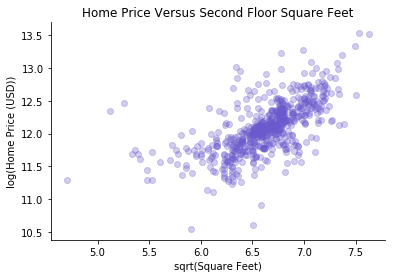

In [72]:
# Show a scatter plot comparing home price and home square feet
plt.scatter(np.log(two_story_training['2ndFlrSF']),np.log(two_story_training['SalePrice']),color="slateblue",alpha=0.3)
plt.title("Home Price Versus Second Floor Square Feet")
plt.xlabel("sqrt(Square Feet)")
plt.ylabel("log(Home Price (USD))")
plt.grid(False)
sns.despine()